In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [31]:
sptl_data = pd.read_csv('sptl.csv')
sptl_data.index = pd.to_datetime(sptl_data['Date'])
sptl_data.drop('Date', axis=1, inplace=True)

In [32]:
# READ excel file
effr_data = pd.read_excel('effr.xlsx', sheet_name='Results')
effr_data = effr_data.set_index('Effective Date')
effr_data.index = pd.to_datetime(effr_data.index)
effr_data = effr_data.sort_index()
effr_data.head()

/Users/vincentzhao/anaconda3/envs/algorithm_trading/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
Effective Date,,,,,,,,,,,,,,,,,,
2014-01-02,EFFR,0.08,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.03,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,EFFR,0.08,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.02,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,EFFR,0.08,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.03,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,EFFR,0.07,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.03,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,EFFR,0.07,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.02,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# adjust annual risk-free rate to daily
dc = 1/252
effr_data["daily rate (%)"] = effr_data["Rate (%)"] * dc / 100
effr_data

,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID,daily rate (%)
Effective Date,,,,,,,,,,,,,,,,,,,
2014-01-02,EFFR,0.08,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.03,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.000003
2014-01-03,EFFR,0.08,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.02,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.000003
2014-01-06,EFFR,0.08,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.03,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.000003
2014-01-07,EFFR,0.07,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.03,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.000003
2014-01-08,EFFR,0.07,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.02,0.31,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,EFFR,1.55,1.5,1.54,1.56,1.61,71.0,1.5,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000062
2019-12-26,EFFR,1.55,1.5,1.54,1.56,1.61,75.0,1.5,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000062
2019-12-27,EFFR,1.55,1.5,1.54,1.56,1.60,73.0,1.5,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000062


In [34]:
sptl_data.index.difference(effr_data.index)

DatetimeIndex(['2014-10-13', '2014-11-11', '2015-10-12', '2015-11-11',
               '2016-10-10', '2016-11-11', '2017-10-09', '2018-10-08',
               '2018-11-12', '2019-10-14', '2019-11-11'],
              dtype='datetime64[ns]', freq=None)

In [35]:
missing_dates = sptl_data.index.difference(effr_data.index)
def find_nearest_date(target_date, date_index):
    distances = abs(date_index - target_date)
    idx = distances.argmin()
    return date_index[idx]

for date in missing_dates:
    closest_date = find_nearest_date(date, effr_data.index)
    effr_data.loc[date] = effr_data.loc[closest_date].copy()
effr_data.sort_index(inplace=True)

In [36]:
daily_interest_rate = effr_data["daily rate (%)"].astype(float)[sptl_data.index]

In [37]:
daily_interest_rate

Date
2014-01-02    0.000003
2014-01-03    0.000003
2014-01-06    0.000003
2014-01-07    0.000003
2014-01-08    0.000003
                ...   
2019-12-23    0.000062
2019-12-24    0.000062
2019-12-26    0.000062
2019-12-27    0.000062
2019-12-30    0.000062
Name: daily rate (%), Length: 1509, dtype: float64

In [38]:
# calculate daily excess return
sptl_data['return'] = ((sptl_data['Adj Close'] - sptl_data['Adj Close'].shift(1)) / sptl_data['Adj Close'].shift(1)) * 100
sptl_data['excess return'] = (sptl_data['return']  - effr_data['daily rate (%)'])
sptl_data['daily_risk_free_rate'] = daily_interest_rate
sptl_data

,Open,High,Low,Close,Adj Close,Volume,return,excess return,daily_risk_free_rate
Date,,,,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299053,25400,NaN,NaN,0.000003
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283529,22000,-0.066629,-0.066632,0.000003
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380447,3200,0.416251,0.416248,0.000003
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457973,3800,0.331585,0.331582,0.000003
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372700,14800,-0.363514,-0.363517,0.000003
...,...,...,...,...,...,...,...,...,...
2019-12-23,39.290001,39.320000,39.060001,39.160000,35.542130,419900,-0.203840,-0.203901,0.000062
2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660110,164100,0.331944,0.331883,0.000062
2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750870,242300,0.254514,0.254453,0.000062


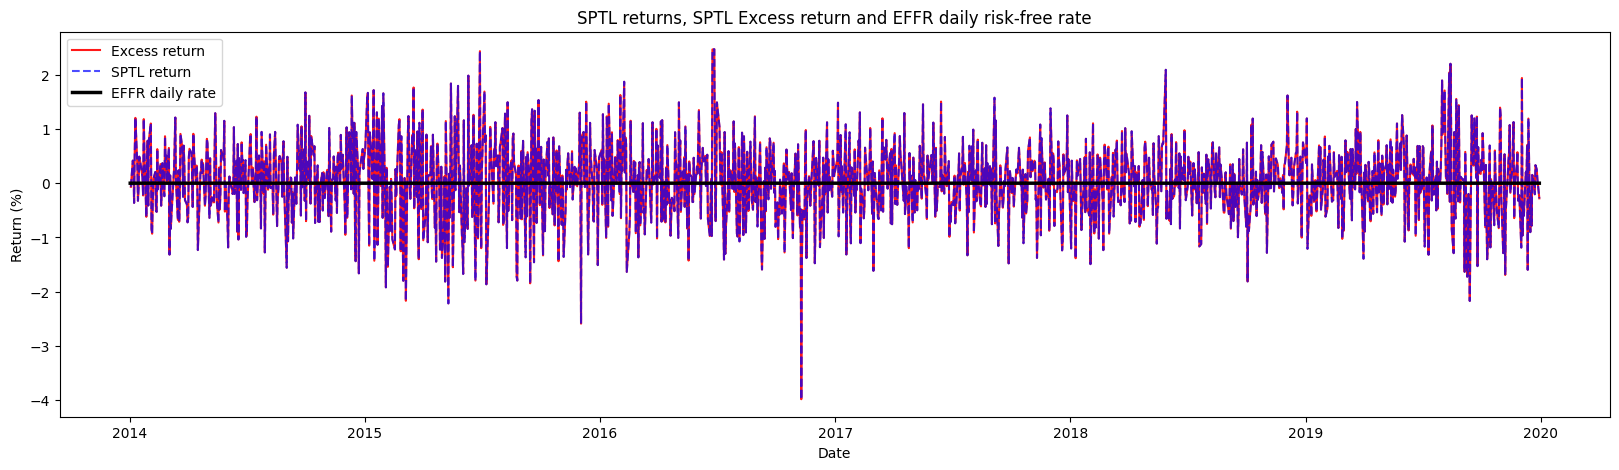

In [39]:
plt.figure(figsize=(20, 5))
plt.plot(sptl_data.index, sptl_data['excess return'], label='Excess return', color='red', linestyle='-', alpha=0.9)
plt.plot(sptl_data.index, sptl_data['return'], label='SPTL return', color='blue', linestyle='--', alpha=0.7)
plt.plot(sptl_data.index, sptl_data['daily_risk_free_rate'], label='EFFR daily rate', color='black', linewidth=2.5)
plt.title('SPTL returns, SPTL Excess return and EFFR daily risk-free rate')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

In [40]:
# Data analysis
def plot_single_etf(etf):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(etf.index, etf['Adj Close'], label='Close', color='blue')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Close Price')
    ax.legend()
    plt.show()

In [41]:
# MV analysis
def moving_average(data: pd.DataFrame, window: int, price_type: str = 'Close'):
    column_name = f"moving_average_{window}"
    data[column_name] = data[price_type].rolling(window=window).mean()
    return data

def time_windows(time_windows: list, data: pd.DataFrame, price_type: str = 'Close'):
    for window in time_windows:
        data = moving_average(data, window, price_type)
    return data

def ma_etfs(etf: pd.DataFrame, time_window: list):
    etf_data = time_windows(time_window, etf)
    return etf

In [42]:
def plot_moving_averages(data: pd.DataFrame, name: str, price_type: str = 'Close'):
    
    plt.figure(figsize=(12, 7))

    plt.plot(data.index, data[price_type], label='Close Price', color='blue', marker='', linestyle='-')
    plt.plot(data.index, data['moving_average_20'], label='20-Day SMA', color='green', linestyle='--')  
    plt.plot(data.index, data['moving_average_50'], label='50-Day SMA', color='red', linestyle='--')  

    plt.title(f'Close Price and Moving Averages for {name}')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

def plot_moving_averages_etfs(etf: pd.DataFrame, name: str):
    plot_moving_averages(etf, name)

In [43]:
def plot_acf_pacf(data: pd.Series, lags: int = 50):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    sgt.plot_acf(data.dropna(), lags=lags, alpha=0.05, ax=ax[0]) # 95% CI
    sgt.plot_pacf(data.dropna(), lags=lags, alpha=0.05, ax=ax[1]) # 95% CI

    plt.show()

In [44]:
target_data = sptl_data.copy()

In [45]:
training_data_model_size = int(len(target_data) * 0.4)
validation_data_model_size = int(len(target_data) * 0.3)
testing_data_model_size = int(len(target_data) * 0.3)

training_data_model = target_data[:training_data_model_size].copy()
validation_data_model = target_data[training_data_model_size:training_data_model_size + validation_data_model_size].copy()
testing_data_model = target_data[training_data_model_size + validation_data_model_size:].copy()

In [46]:
training_data_non_model_size = int(len(target_data) * 0.7)
testing_data_non_model_size = int(len(target_data) * 0.3)
training_data_non_model = target_data[:training_data_non_model_size].copy()
testing_data_non_model = target_data[training_data_non_model_size:].copy()

In [47]:
# ADF test on training data
def adf_test(data: pd.Series):
    adf = adfuller(data, autolag='AIC')
    print(f'ADF Statistic: {adf[0]}')
    print(f'p-value: {adf[1]}')
    print(f'Critical Values: {adf[4]}')
    if adf[1] <= 0.05:
        print('Reject the null hypothesis. Data is stationary')

adf_test(training_data_model['Close'])

ADF Statistic: -2.1831390934302437
p-value: 0.21242180472283195
Critical Values: {'1%': -3.441277537487585, '5%': -2.8663610578661083, '10%': -2.5693375106104357}


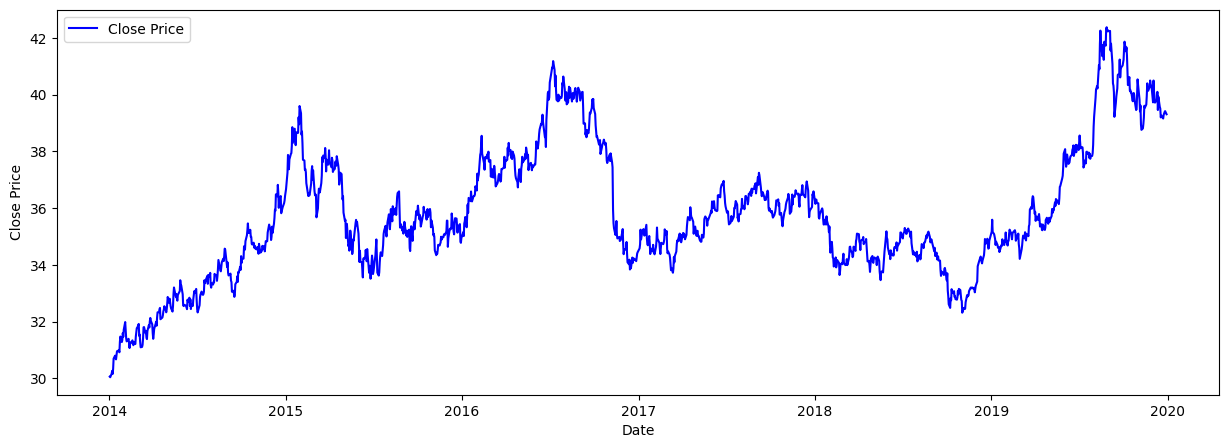

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(target_data.index, target_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158.413, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=153.683, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=155.310, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=157.202, Time=0.04 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=159.198, Time=0.06 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=159.516, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154.112, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=155.395, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=156.342, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=159.201, Time=0.12 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=157.667, Time=0.15 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=158.076, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=155.207, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=157.180, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] inter

/Users/vincentzhao/anaconda3/envs/algorithm_trading/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/vincentzhao/anaconda3/envs/algorithm_trading/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


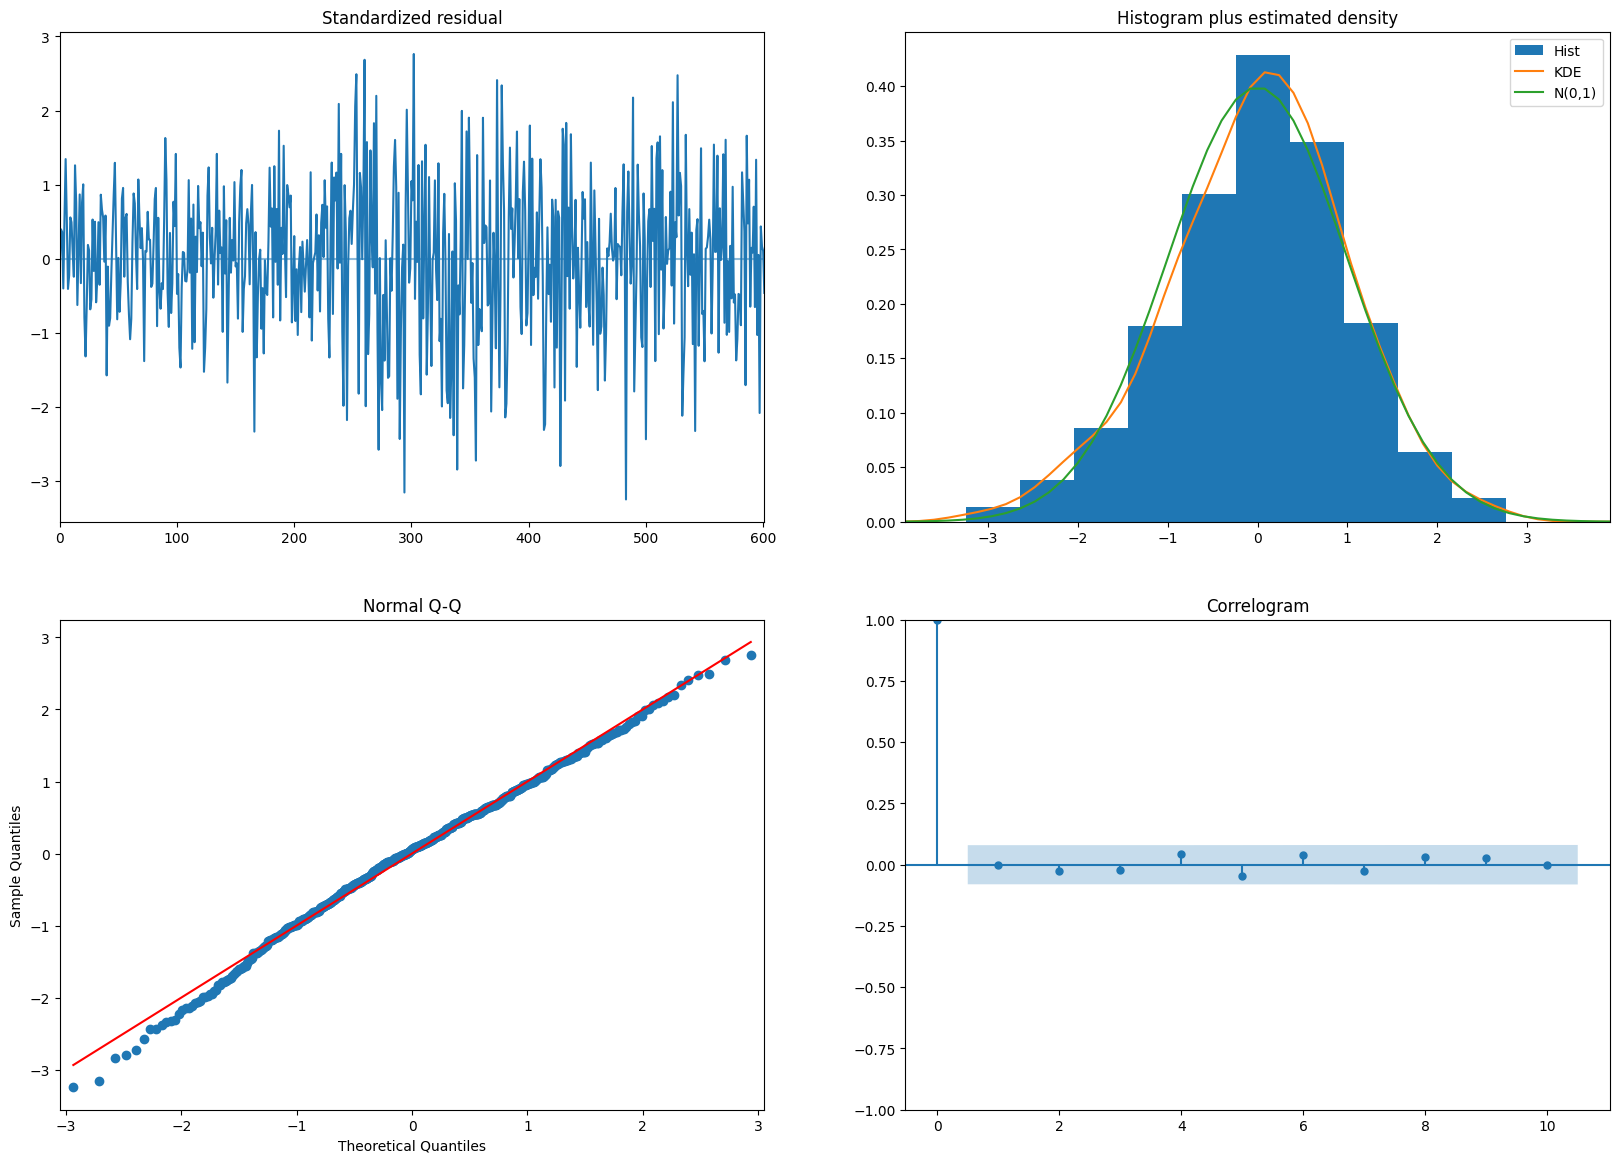

In [49]:
def training_auto_arima(training_data: pd.Series, testing_data: pd.Series):
    model = pm.auto_arima(training_data,
                     d=1,
                     seasonal=False,
                     stepwise=False,
                     suppress_warnings=True,
                     error_action="ignore",
                     max_p=6, 
                     max_order=None, 
                     trace=True)
    
    model.plot_diagnostics(figsize=(20,14))
    
    model_params = model.get_params()
    
    predictions = []

    for actual_value in testing_data.values:
        next_day_prediction_series = model.predict(n_periods=1)
        if type(next_day_prediction_series) == np.ndarray:
            next_day_prediction_series = pd.Series(next_day_prediction_series)
        next_day = next_day_prediction_series.iloc[0]
        predictions.append(next_day)
        model.update(actual_value)
    return model_params, predictions

model_params, predictions = training_auto_arima(training_data_model['Close'], validation_data_model['Close'])

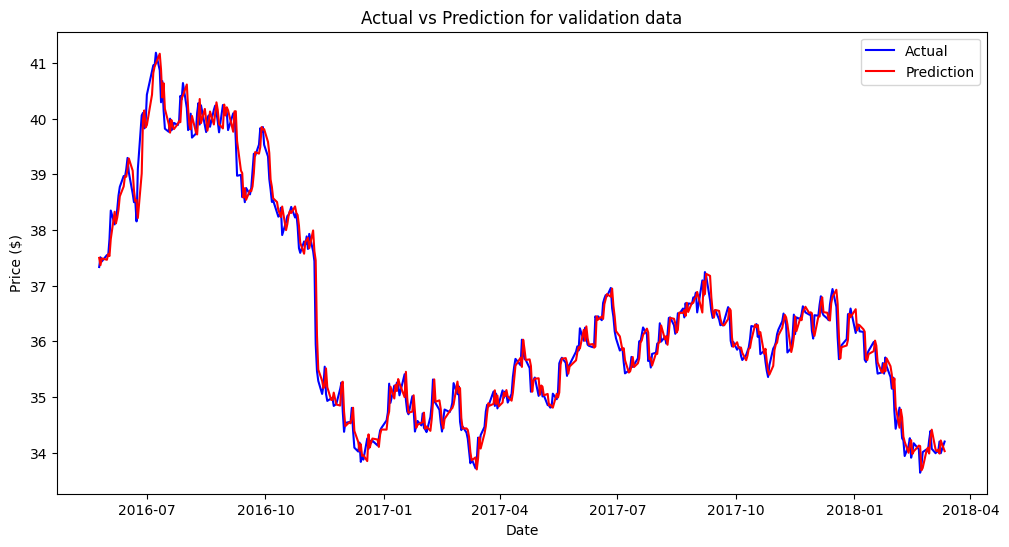

In [50]:
def plot_testing_prediction(testing_data: pd.Series, predictions: list, dataset_name: str = 'validation'):
    plt.figure(figsize=(12, 6))
    plt.plot(testing_data.index, testing_data.values, label='Actual', color='blue')
    plt.plot(testing_data.index, predictions, label='Prediction', color='red')
    plt.title(f'Actual vs Prediction for {dataset_name} data')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

plot_testing_prediction(validation_data_model['Close'], predictions, 'validation')

In [51]:
validation_data_model

,Open,High,Low,Close,Adj Close,Volume,return,excess return,daily_risk_free_rate
Date,,,,,,,,,
2016-05-25,37.480000,37.535000,37.279999,37.334999,30.853643,109200,-0.347010,-0.347025,0.000015
2016-05-26,37.415001,37.605000,37.415001,37.509998,30.998268,53600,0.468745,0.468731,0.000015
2016-05-27,37.500000,37.544998,37.389999,37.435001,30.936279,59400,-0.199976,-0.199990,0.000015
2016-05-31,37.205002,37.630001,37.205002,37.549999,31.031330,62800,0.307248,0.307236,0.000012
2016-06-01,37.669998,37.814999,37.509998,37.540001,31.086802,162600,0.178761,0.178747,0.000015
...,...,...,...,...,...,...,...,...,...
2018-03-06,34.090000,34.189999,34.020000,34.029999,29.428011,69500,0.117659,0.117603,0.000056
2018-03-07,34.180000,34.189999,34.009998,34.009998,29.410727,43000,-0.058733,-0.058790,0.000056
2018-03-08,34.130001,34.270000,34.110001,34.200001,29.575020,40700,0.558616,0.558560,0.000056


In [52]:
predictions_df = pd.DataFrame(predictions, index=validation_data_model.index, columns=['Tomorrow Prediction'])
new_df = pd.concat([validation_data_model, predictions_df], axis=1)
new_df.to_csv('validation_data_prediction.csv')

In [53]:
training_validation_data_model = pd.concat([training_data_model, validation_data_model])
training_validation_data_model

,Open,High,Low,Close,Adj Close,Volume,return,excess return,daily_risk_free_rate
Date,,,,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299053,25400,NaN,NaN,0.000003
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283529,22000,-0.066629,-0.066632,0.000003
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380447,3200,0.416251,0.416248,0.000003
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457973,3800,0.331585,0.331582,0.000003
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372700,14800,-0.363514,-0.363517,0.000003
...,...,...,...,...,...,...,...,...,...
2018-03-06,34.090000,34.189999,34.020000,34.029999,29.428011,69500,0.117659,0.117603,0.000056
2018-03-07,34.180000,34.189999,34.009998,34.009998,29.410727,43000,-0.058733,-0.058790,0.000056
2018-03-08,34.130001,34.270000,34.110001,34.200001,29.575020,40700,0.558616,0.558560,0.000056


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=188.151, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=186.248, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=188.223, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=190.172, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=191.974, Time=0.09 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=188.275, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=186.305, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=188.230, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=190.221, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=186.023, Time=0.19 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=186.116, Time=0.12 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=183.983, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=188.209, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=185.671, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=189.499, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] i

/Users/vincentzhao/anaconda3/envs/algorithm_trading/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/vincentzhao/anaconda3/envs/algorithm_trading/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


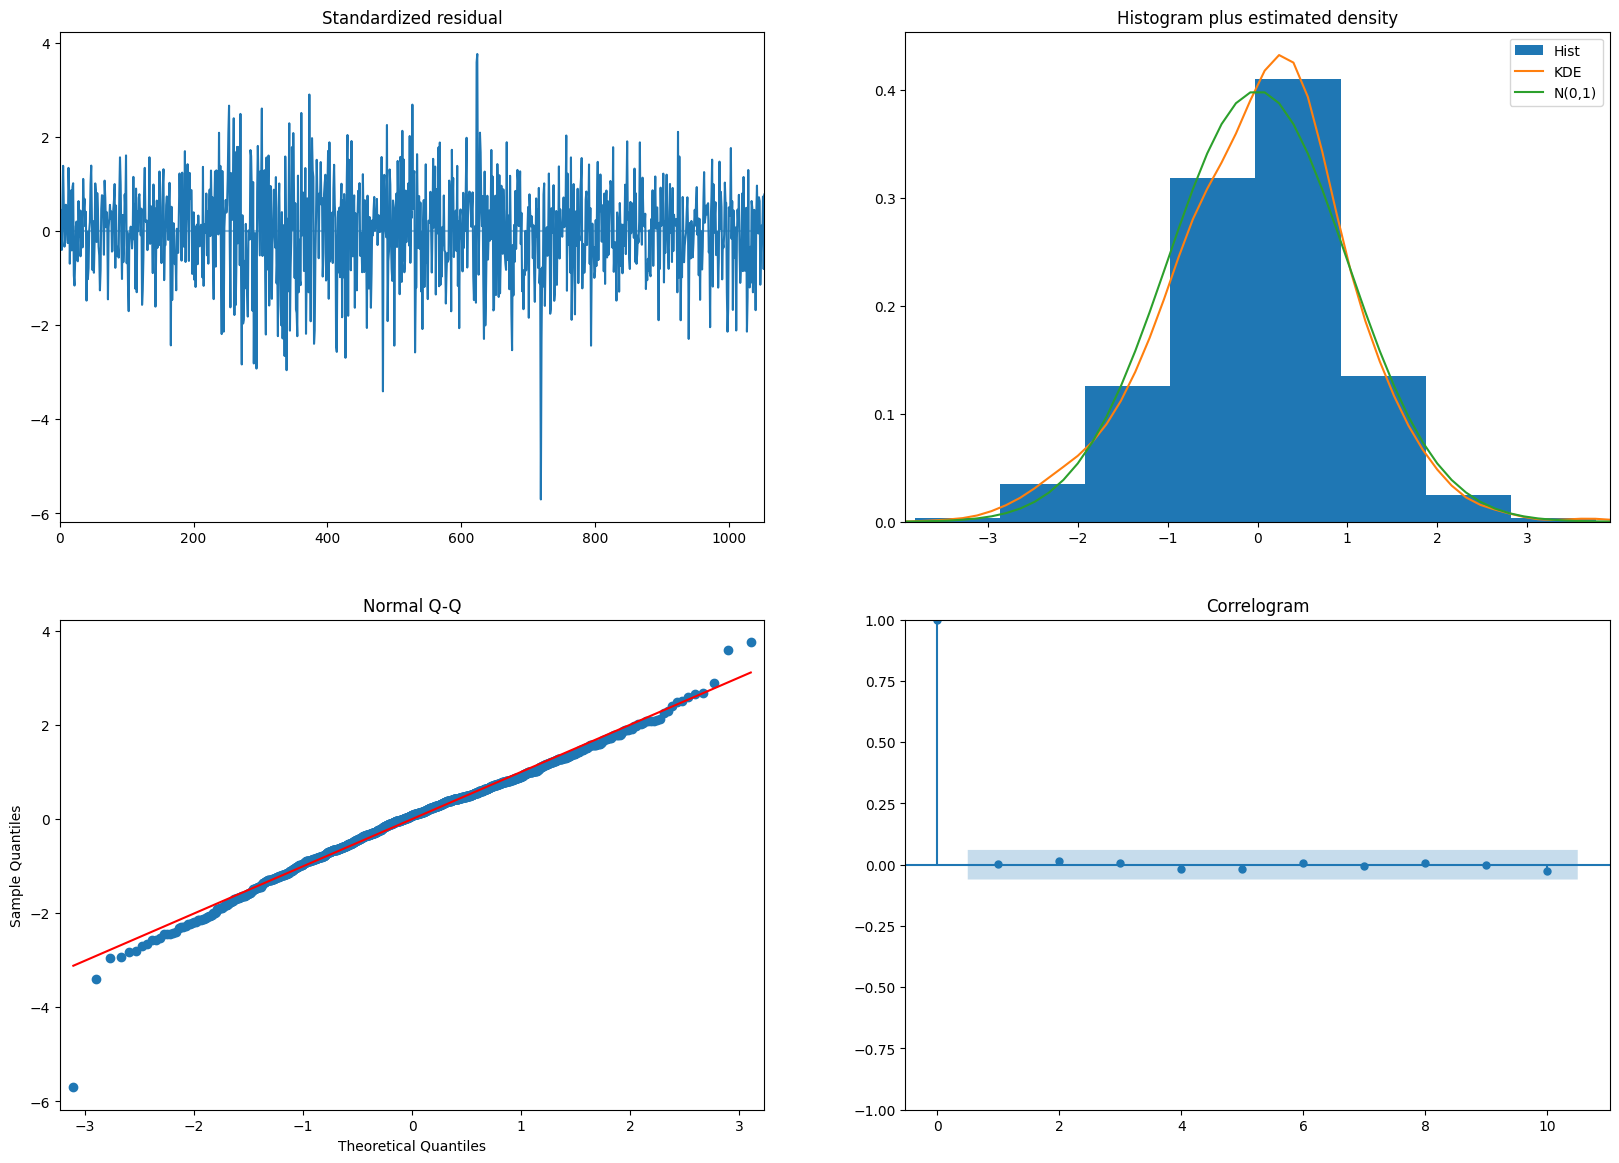

In [54]:
model_params, predictions_test = training_auto_arima(training_validation_data_model['Close'], testing_data_model['Close'])

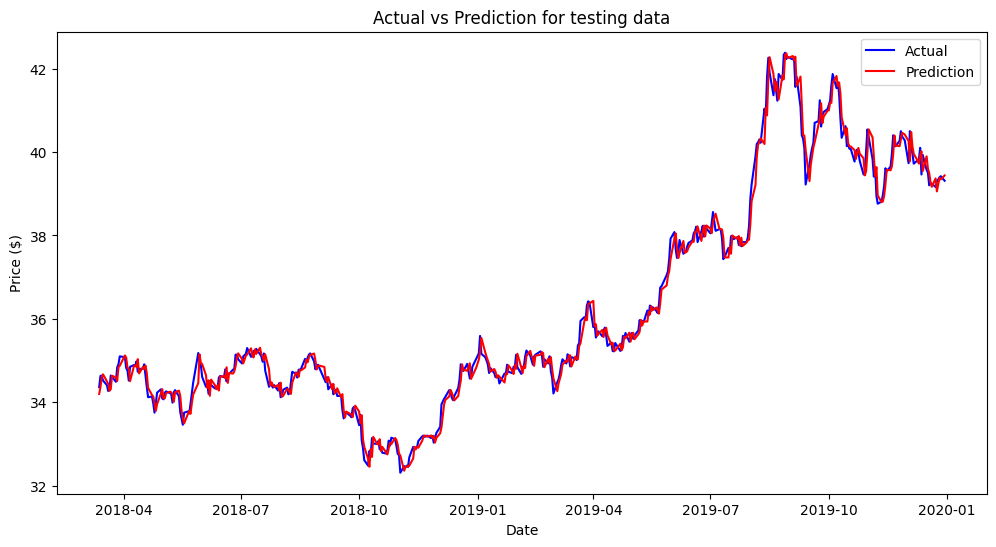

In [55]:
plot_testing_prediction(testing_data_model['Close'], predictions_test, 'testing')

In [56]:
predictions_testing_df = pd.DataFrame(predictions_test, index=testing_data_model.index, columns=['Tomorrow Prediction'])
new_df = pd.concat([testing_data_model, predictions_testing_df], axis=1)
new_df.to_csv('testing_data_prediction.csv')

In [57]:
training_data_non_model.to_csv('training_data_non_model.csv')

In [58]:
testing_data_non_model.to_csv('testing_data_non_model.csv')